# Набор данных об успеваемости студентов

## Постановка задачи

Набор данных об успеваемости учащихся — это набор данных, предназначенный для изучения факторов, влияющих на успеваемость учащихся. Набор данных состоит из 10 000 записей об учащихся, каждая из которых содержит информацию о различных факторах и индекс успеваемости.

Нужно обработать данные для более точного предсказания результатов обучения и сравнить результаты разных моделей.

P.S: Этот набор данных является синтетическим и создан в иллюстративных целях. Взаимосвязи между переменными и индексом производительности могут не отражать реальные сценарии.

## Подключение модулей

In [1]:
# импортируем необходимые модули
import pandas as pd
import numpy as np
import seaborn as sns

# Вывод графиков здесь
import matplotlib.pyplot as plt
%matplotlib inline

# Игнорируем ошибки
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импортируем модели обучения
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Имортируем модули для обучения моделей
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Загрузка данных

In [4]:
# Загружаем данные из файла формата csv и сохраняем в дата-фрейм
df = pd.read_csv('Student_Performance.csv')

In [5]:
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


**Описание данных**
- Hours Studied - Часы обучения
- Previous Scores - Балл ученика
- Extracurricular Activities - Внеклассные занятия
- Sleep Hours - Часы сна
- Sample Question Papers Practiced - Количесвто обработанных вопросов студента
- Performance Index - Индекс производительности (целевая переменная)

In [6]:
# Выводим размерность
df.shape

(10000, 6)

Набор данных имеет 10.000 строчек и 6 признаков.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [9]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [10]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Пустых значений нет. Встречаются 3 типа данных: float64, int64, object. 

In [11]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
df.describe(include='object')

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


В среднем ученик тратит на учёбу около 5 часов. Минимальное количество часов - 1, максимальное - 9.

В среднем за тест получают 69 баллов. Минимальный балл - 40, максимальный 99.

Спят ученики около 6 часов, минимум - 4, а максимум - 9.

В среднем прорешивают около 5 пробных вариантов, минимум - 0, максимум - 9.

Ученик чаще всего не участвует во внеклассных занятиях.

Целевая переменная варьируется от 40 до 100. Среднее значение 55. 

In [13]:
# Выводим количесвто дубликатов
df.duplicated().sum()

127

In [14]:
# Выводим дубликаты
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [15]:
# Удаляем дубликаты и обновляем индексы
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [16]:
# Выводим новую размерность
df.shape

(9873, 6)

После удаления у нас осталось 9.873 строчки.

In [17]:
# Выводим количество уникальных значений каждого столбца
for col in df.columns:
    print(f'{col}: {df[col].value_counts()}')

Hours Studied: Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64
Previous Scores: Previous Scores
54    213
87    200
56    190
62    183
89    182
60    181
77    179
53    178
52    175
57    174
49    173
65    173
83    172
58    172
91    172
79    172
93    172
40    171
66    171
84    171
90    171
47    171
75    171
44    170
97    170
70    169
95    168
67    168
48    168
92    167
42    166
43    165
73    164
78    164
41    163
88    163
63    161
46    161
59    161
61    161
86    159
81    158
96    158
71    158
98    157
85    157
99    154
69    152
68    152
80    151
45    151
64    147
82    147
72    147
94    145
55    143
74    141
76    140
51    139
50    121
Name: count, dtype: int64
Extracurricular Activities: Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64
Sleep Hours: Sleep Hours
8    1784
7    1653
6    1645
9    1606
4    1605
5    1580
Name: 

In [18]:
# Выводим уникальные значения
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Hours Studied: [7 4 8 5 3 6 2 1 9]
Previous Scores: [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Extracurricular Activities: ['Yes' 'No']
Sleep Hours: [9 4 7 5 8 6]
Sample Question Papers Practiced: [1 2 5 6 0 8 3 4 9 7]
Performance Index: [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]


In [19]:
# Выводм количество уникальных значений для Extracurricular Activities
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

<Axes: ylabel='proportion'>

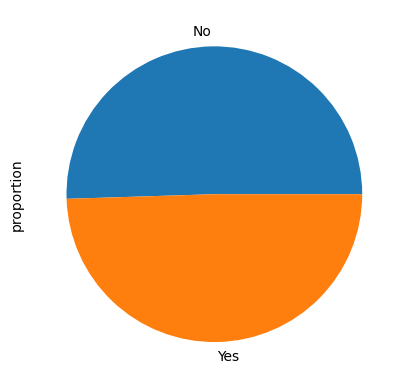

In [20]:
# Выводим график
df['Extracurricular Activities'].value_counts(normalize=True).plot.pie()

Можно заметить, что данные равномерные, но с небольшим уклоном в "No" или же 0.

In [21]:
# Перекодируем бинарные данные для более лучшего обучения моделей
df=pd.get_dummies(df,columns=['Extracurricular Activities'],drop_first=True, dtype=int)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9868,1,49,4,2,23.0,1
9869,7,64,8,5,58.0,1
9870,6,83,8,5,74.0,1
9871,9,97,7,0,95.0,1


In [22]:
# Изменяем тип столбца Performance Index c float на int
df['Performance Index'] = df['Performance Index'].astype(int)

In [23]:
# Создаем новый столбец - Свободное время
# df['Free Time'] = 24 - df['Hours Studied'] - df['Sleep Hours']
# df

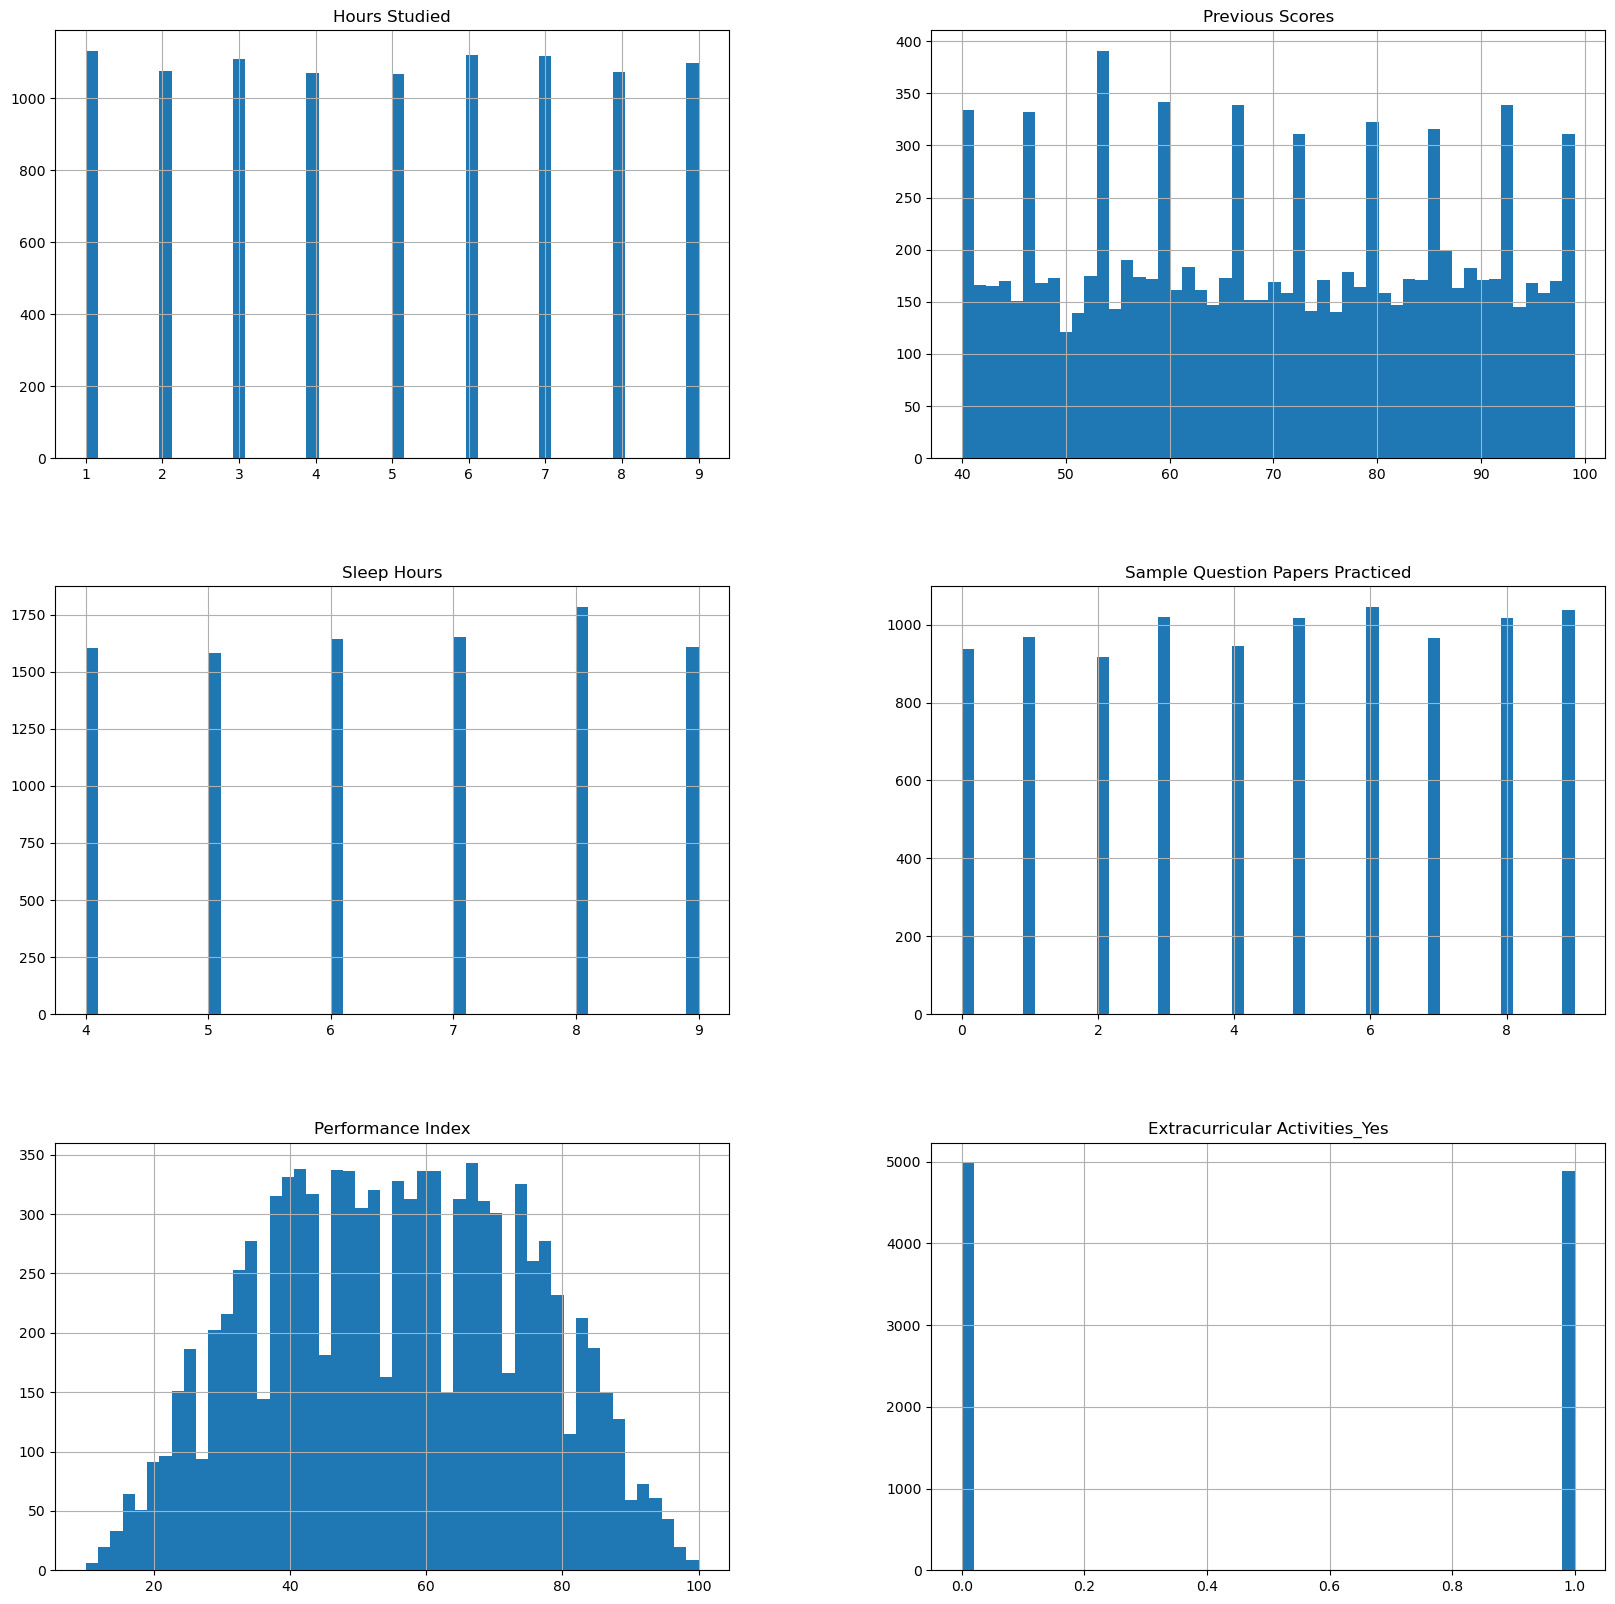

In [24]:
df.hist(figsize=(20,20), bins=50);

Все значения в Hours Studied равномерны, также как и в Sleep Hours, Sample Question Papers Practiced. В Previous Scores встречаются одни и те же значения, которые имеют большое количество учащихся, а так, в основном, данные равномерные. 
Значения Performance Index имеют основной промежуток от 40 до 80.

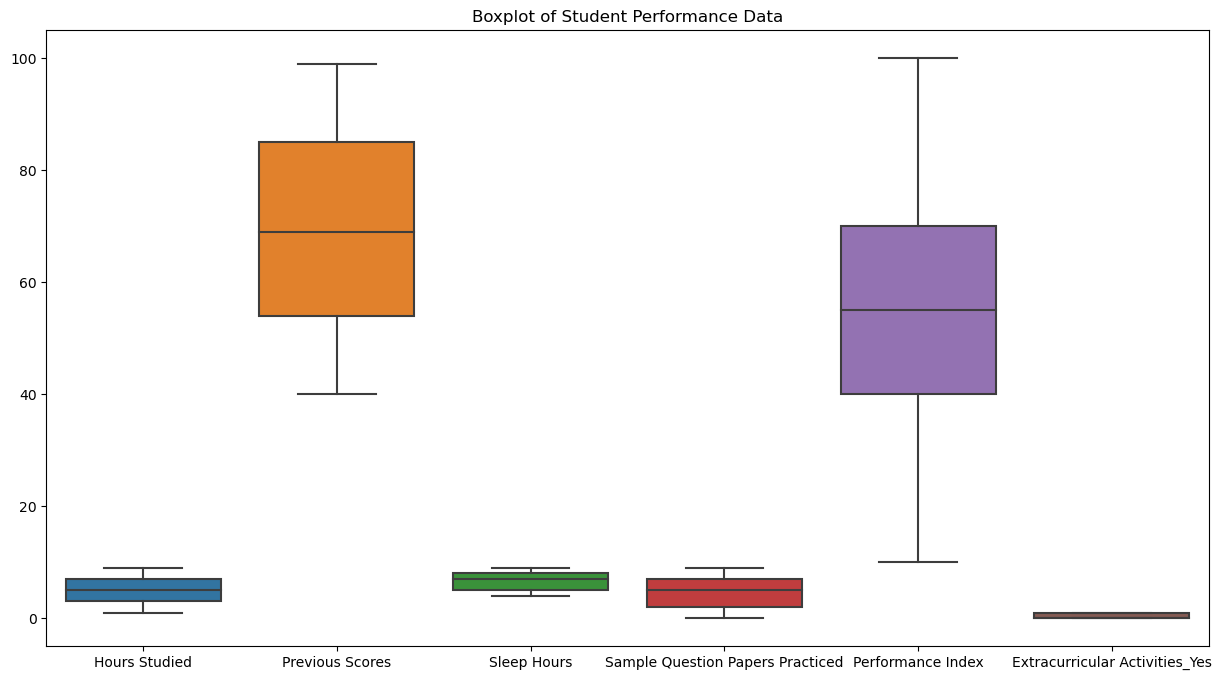

In [25]:
# Выводим боксплоты для каждого столбца
plt.figure(figsize=(15, 8))
plt.title('Boxplot of Student Performance Data')
sns.boxplot(data=df)
plt.show()

Выбросов не наблюдается

<Axes: xlabel='Performance Index', ylabel='Count'>

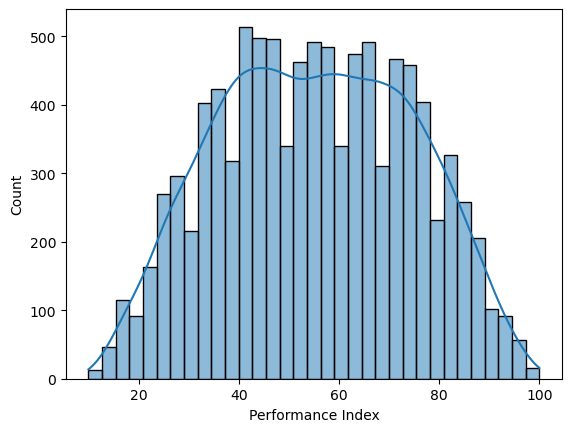

In [26]:
# Выводим график для целевой переменной
sns.histplot(df['Performance Index'], kde=True)

<Figure size 800x600 with 0 Axes>

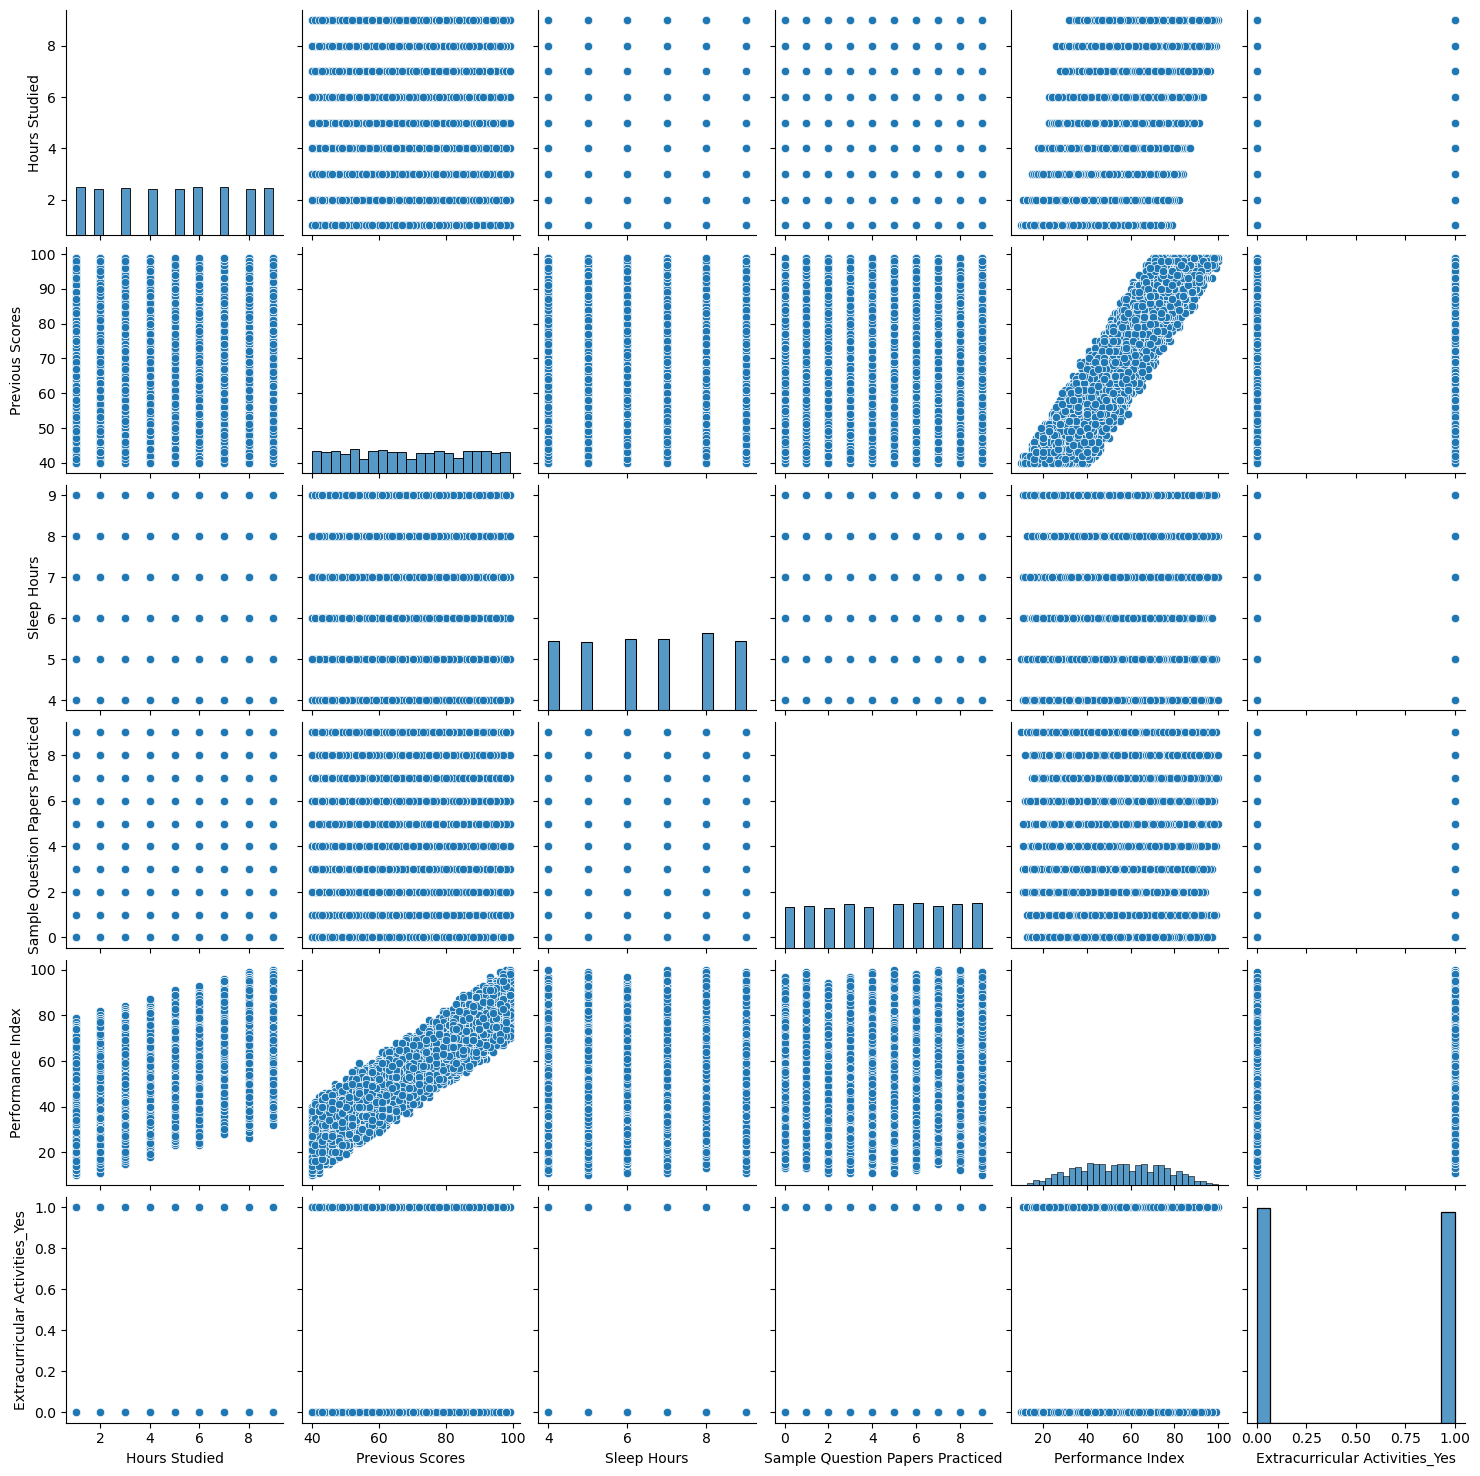

In [27]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: >

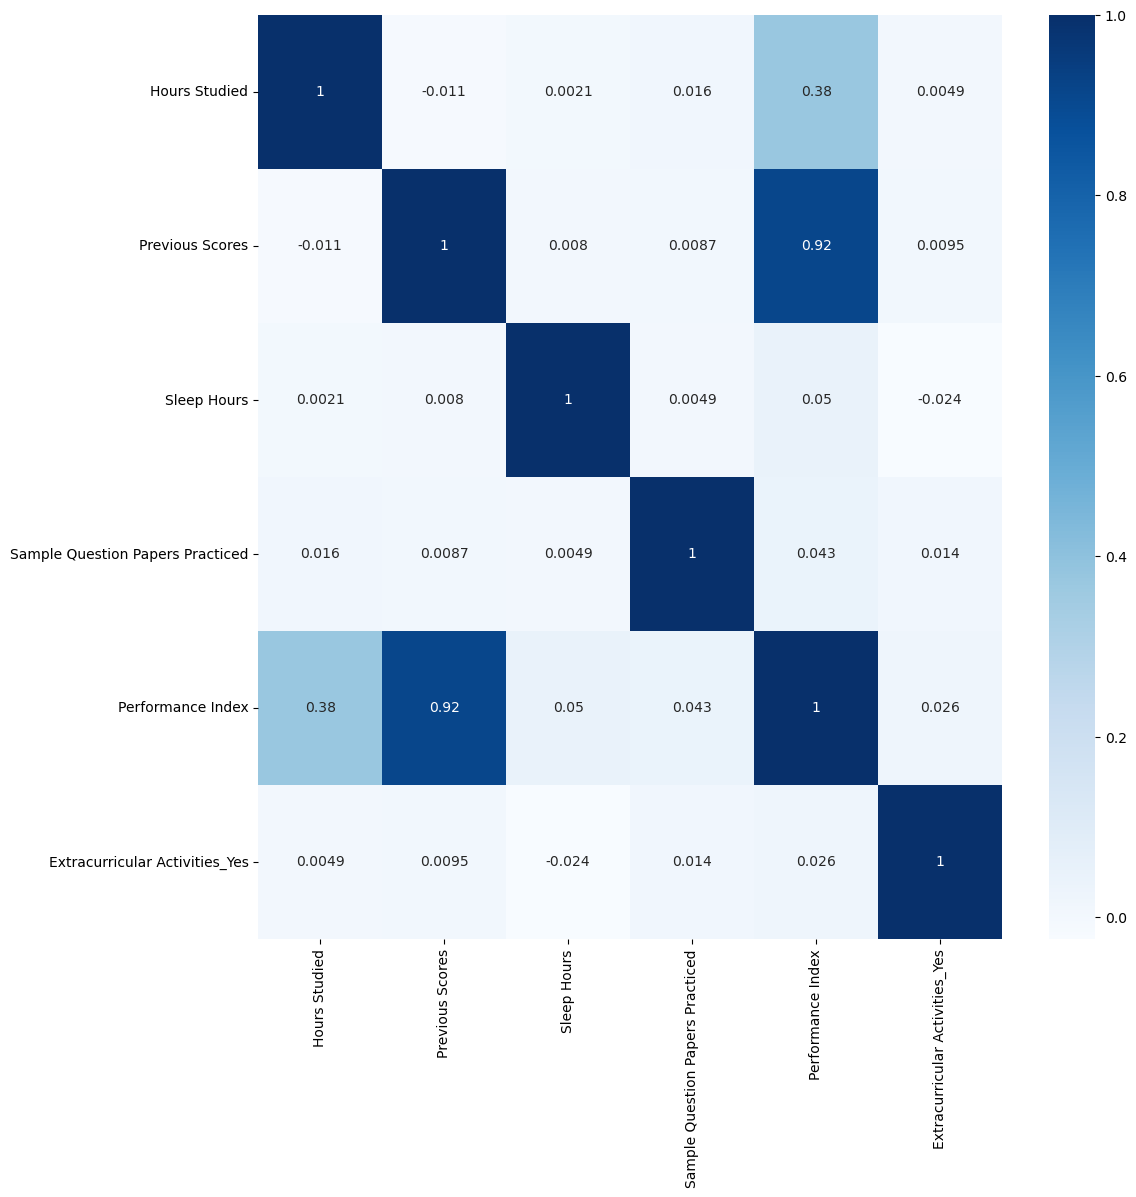

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Присутсвует сильная зависимость между целевой переменной(Performance Index) и Previous Scores, что можно объяснить тем, что чем выше бал теста, тем выше производительность ученика. Также присутсвует небольшая зависимость между целевой переменной(Performance Index) и Hours Studied. Объяснить ее можно тем, что чем больше ученик тратит времени на обучение, тем выше его производительность в учёбе

## Обучение моделей

Запись датасета с Previous scores

In [29]:
# Записываем датасет без целевой переменной
X = df.drop('Performance Index', axis=1)
# Сохраняем целевую переменную
y = df['Performance Index']

In [30]:
# Делим выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Запись датасета без Previous scores

In [31]:
# Записываем датасет без целевой переменной и Previous scores
X2 = df.drop(['Performance Index', 'Previous Scores'], axis=1)
# Сохраняем целевую переменную
y2 = df['Performance Index']

In [32]:
# Делим выборку на тестовую и тренировочную
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## LinearRegression

Проводим обучение с Previous scores

In [33]:
# Инициализируем LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Делаем предсказание
y_pred_lr = lr.predict(X_test)

In [35]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_lr = metrics.mean_absolute_error(y_test,y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test,y_pred_lr)
r_lr = metrics.r2_score(y_test,y_pred_lr)

In [36]:
print(f'mean absolute error: {mae_lr}')
print(f'mean squared error: {mse_lr}')
print(f'R^2 Score: {r_lr * 100:.2f}%')

mean absolute error: 1.6469703984255566
mean squared error: 4.305900938538475
R^2 Score: 98.84%


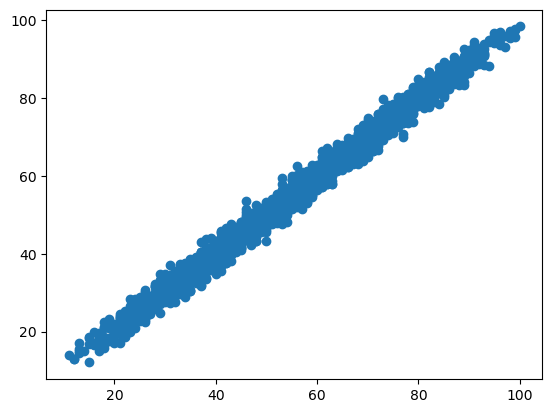

In [37]:
plt.scatter(y_test,y_pred_lr)

Модель имеет очень хороший результат обучения - 99% предсказанных верных значений и она близка к реальным значениям

Проводим обучение без Previous Scores

In [38]:
# Инициализируем LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

In [39]:
# Делаем предсказание
y_pred_lr2 = lr2.predict(X2_test)

In [40]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_lr2 = metrics.mean_absolute_error(y_test,y_pred_lr2)
mse_lr2 = metrics.mean_squared_error(y_test,y_pred_lr2)
r_lr2 = metrics.r2_score(y_test,y_pred_lr2)

In [41]:
print(f'mean absolute error: {mae_lr2}')
print(f'mean squared error: {mse_lr2}')
print(f'R^2 Score: {r_lr2 * 100:.2f}%')

mean absolute error: 15.43377094534091
mean squared error: 318.8471122333766
R^2 Score: 14.33%


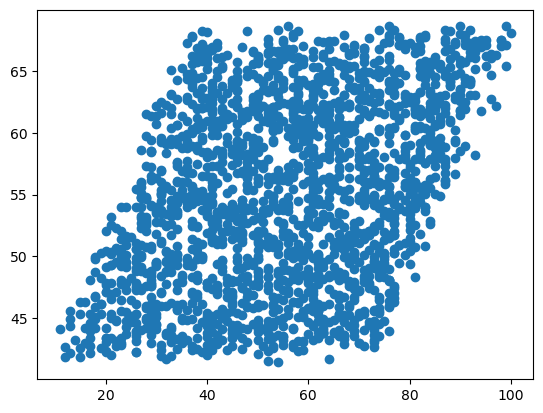

In [42]:
plt.scatter(y_test,y_pred_lr2)

## Ridge

Проводим обучуение с Previuos Scores

In [43]:
# Инициализируем Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [44]:
# Делаем предсказание
y_pred_rd = ridge.predict(X_test)

In [45]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_rd = metrics.mean_absolute_error(y_test,y_pred_rd)
mse_rd = metrics.mean_squared_error(y_test,y_pred_rd)
r_rd = metrics.r2_score(y_test,y_pred_rd)

In [46]:
print(f'mean absolute error: {mae_rd}')
print(f'mean squared error: {mse_rd}')
print(f'R^2 Score: {r_rd * 100:.2f}%')

mean absolute error: 1.6469786994875084
mean squared error: 4.3059442136375745
R^2 Score: 98.84%


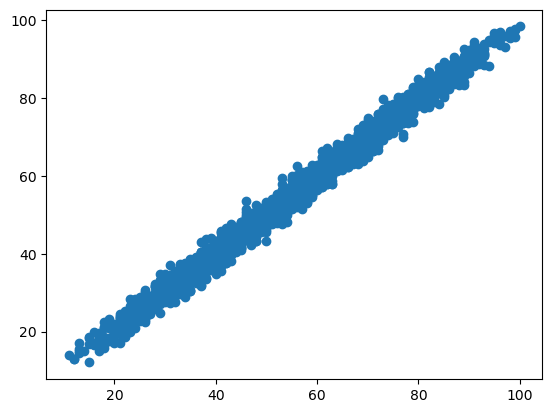

In [47]:
plt.scatter(y_test,y_pred_rd)

Модель имеет очень хороший результат обучения - 98% предсказанных верных значений и она близка к реальным значениям

Проводим обчучение без Previous Scores

In [48]:
# Инициализируем Ridge
ridge2 = Ridge()
ridge2.fit(X2_train, y2_train)

Ridge()

In [49]:
# Делаем предсказание
y_pred_rd2 = ridge2.predict(X2_test)

In [50]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_rd2 = metrics.mean_absolute_error(y_test,y_pred_rd2)
mse_rd2 = metrics.mean_squared_error(y_test,y_pred_rd2)
r_rd2 = metrics.r2_score(y_test,y_pred_rd2)

In [51]:
print(f'mean absolute error: {mae_rd}')
print(f'mean squared error: {mse_rd}')
print(f'R^2 Score: {r_rd2 * 100:.2f}%')

mean absolute error: 1.6469786994875084
mean squared error: 4.3059442136375745
R^2 Score: 14.33%


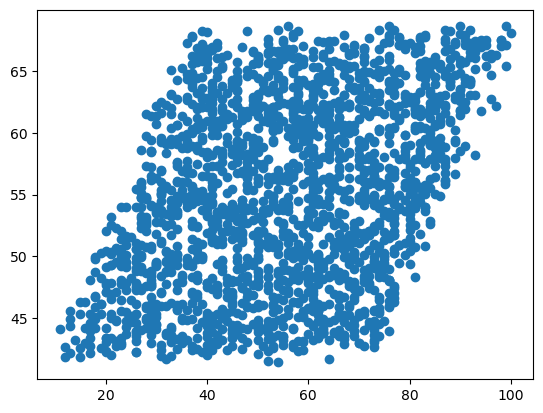

In [52]:
plt.scatter(y_test,y_pred_rd2)

Модель получилась не такой хорошей как предыдущая.

## Lasso

Проводим обучение с Previous Scores

In [53]:
# Инициализируем Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [54]:
# Делаем предсказание
y_pred_ls = lasso.predict(X_test)

In [55]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_ls= metrics.mean_absolute_error(y_test,y_pred_ls)
mse_ls=metrics.mean_squared_error(y_test,y_pred_ls)
r2_ls = metrics.r2_score(y_test,y_pred_ls)

In [56]:
print(f'mean absolute error: {mae_ls}')
print(f'mean squared error: {mse_ls}')
print(f'R^2 Score: {r2_ls * 100:.2f}%')

mean absolute error: 1.8214900045523716
mean squared error: 5.223138692603751
R^2 Score: 98.60%


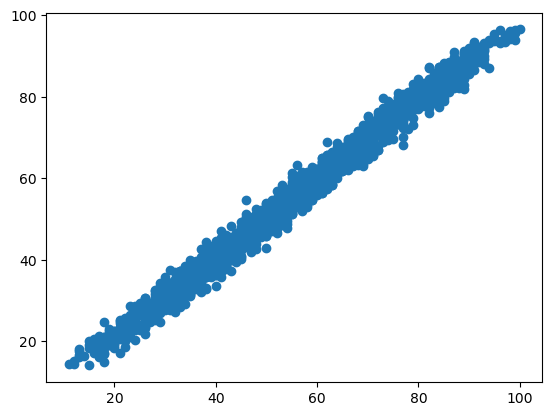

In [57]:
plt.scatter(y_test,y_pred_ls)

Модель имеет очень хороший результат обучения - 98% предсказанных верных значений и она близка к реальным значениям.

Проводим обучение без Previous Scores

In [58]:
# Инициализируем Lasso
lasso2 = Lasso()
lasso2.fit(X2_train, y2_train)

Lasso()

In [59]:
# Делаем предсказание
y_pred_ls2 = lasso2.predict(X2_test)

In [60]:
# Вычисляем абсолютную, квадротичную ошибку и r2_score
mae_ls2= metrics.mean_absolute_error(y_test,y_pred_ls2)
mse_ls2=metrics.mean_squared_error(y_test,y_pred_ls2)
r2_ls2 = metrics.r2_score(y_test,y_pred_ls2)

In [61]:
print(f'mean absolute error: {mae_ls2}')
print(f'mean squared error: {mse_ls2}')
print(f'R^2 Score: {r2_ls2 * 100:.2f}%')

mean absolute error: 15.473017138686904
mean squared error: 320.7425683304249
R^2 Score: 13.82%


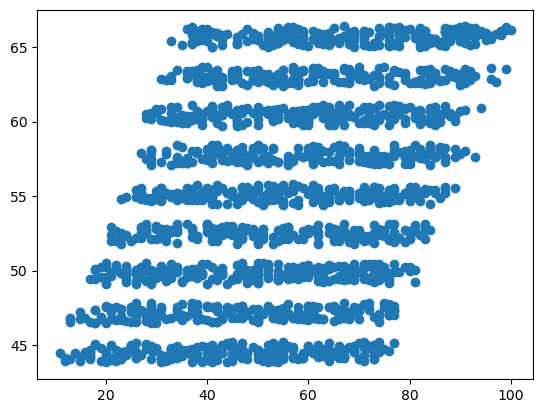

In [62]:
plt.scatter(y_test,y_pred_ls2)

## Сравнение

In [63]:
# Создаем таблмцу, содержащую названия регрессий и их результат обучения моделей
table_res = pd.DataFrame(columns=["Regressors with previous scores", "R2_Scores", 'R2_Scores2'])

In [64]:
# Заполняем данные
table_res["Regressors with previous scores"] = ["LinearRegression", "Ridge", "Lasso"]
table_res["R2_Scores"] = [r_lr, r_rd, r2_ls]
table_res["R2_Scores2"] = [r_lr2, r_rd2, r2_ls2]

In [65]:
table_res

,Regressors with previous scores,R2_Scores,R2_Scores2
0,LinearRegression,0.988430,0.143263
1,Ridge,0.988430,0.143263
2,Lasso,0.985966,0.138170


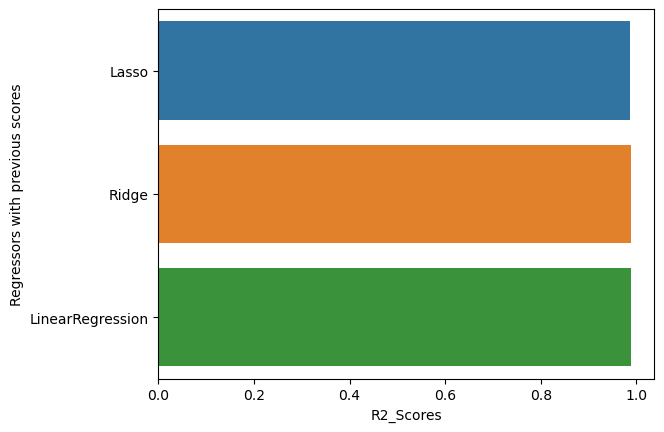

In [66]:
# Выводим график
sns.barplot(x='R2_Scores', y='Regressors with previous scores', data=table_res.sort_values(by='R2_Scores'));

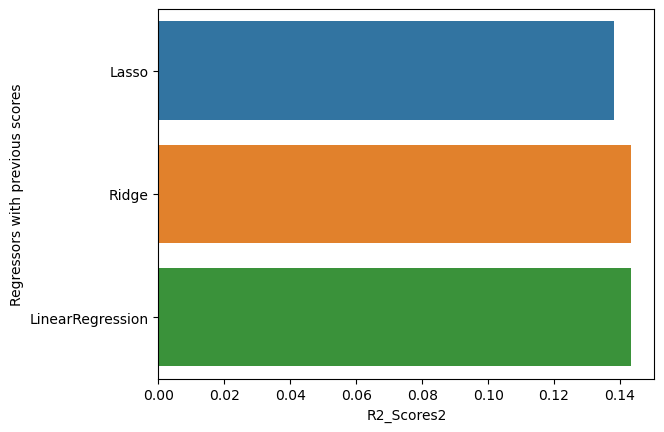

In [67]:
# Выводим график
sns.barplot(x='R2_Scores2', y='Regressors with previous scores', data=table_res.sort_values(by='R2_Scores2'));

Можно заметить, что результаты обучения не сильно отличаются друг от друга, но все же лучшим является LinearRegression. 

# Вывод

Мы проанализировали данные, удалили дубликаты, выяснили, что датасет не имеет пустых значений, преобразовали некоторые данные в числовые бинарные, просмотрели как влияют данные друг на друга, а также просмотрели выбросы, добавили новые столбцы, чтобы увеличить результат обучения моделей, но в действительности они ничем не помогли, и сравнили результаты обучения с сильной коррелирующей переменной и без.

Провели обучение 3 моделей: LinearRegression, DecisionTreeRegressor и RandomForestRegressor. В результате обучения выяснилось, что лучшей моделью является LinearRegression с результатом в 99%.

Учтем то, что данные были синтетически созданными.